Iteration 0: Loss = 4.9311652183532715
Iteration 1000: Loss = 0.0012515324633568525
Iteration 2000: Loss = 0.0010346402414143085
Iteration 3000: Loss = 0.00043026593630202115
Iteration 4000: Loss = 0.0005074106738902628
Iteration 5000: Loss = 0.001345768221653998
Iteration 6000: Loss = 0.00024444260634481907
Iteration 7000: Loss = 0.0003559354809112847
Iteration 8000: Loss = 0.00020991430210415274
Iteration 9000: Loss = 0.0003662926028482616


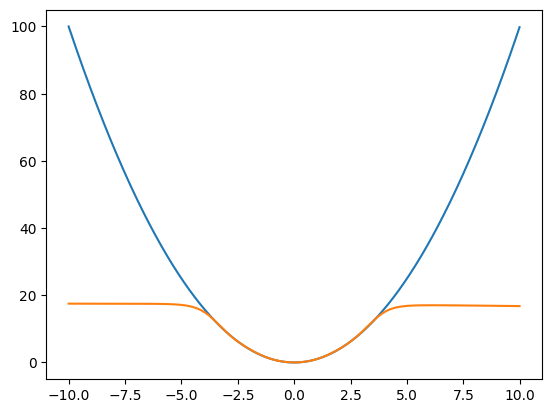

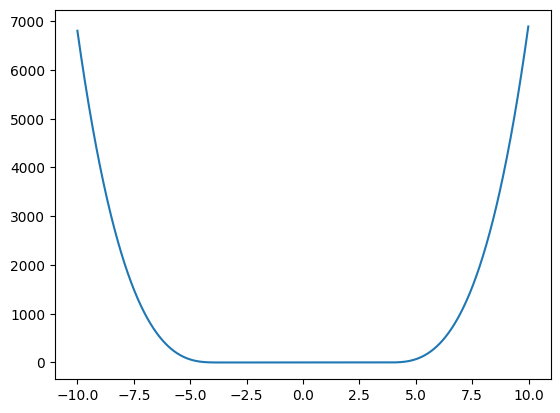

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


# Define the neural network
class Net(nn.Module):

    def __init__(self, hidden_size, activation):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.activation = activation

    def forward(self, x):
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x


# Create the neural network and optimizer
net = Net(10, nn.Tanh())
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Train the neural network
for i in range(10000):
    x = torch.randn(100, 1)  # generate a random input value
    y = x**2  # compute the corresponding output value
    optimizer.zero_grad()  # zero the gradients
    output = net(x)  # forward pass
    loss = nn.functional.mse_loss(output, y)  # compute the loss
    loss.backward()  # backward pass
    optimizer.step()  # update the weights
    if i % 1000 == 0:
        print("Iteration {}: Loss = {}".format(i, loss.item()))

# Test the neural network
x_test = torch.arange(-10, 10, .01).unsqueeze(1)
y_test = x_test**2
y_pred = net(x_test).detach()
err = (y_pred - y_test)**2

plt.plot(x_test, y_test)
plt.plot(x_test, y_pred)
plt.show()

plt.plot(x_test, err)
plt.show()

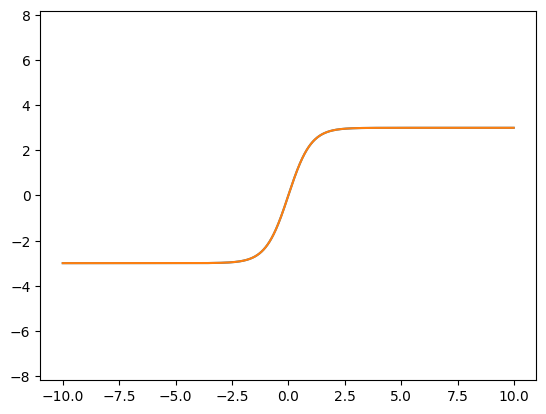

In [6]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(-10, 10, .01)
y = 3 *np.tanh(x)
fig, ax = plt.subplots()

# Plot your data
ax.plot(x, y, label='Data')

# Set the axis to be square
ax.axis('equal')

plt.plot(x, y)

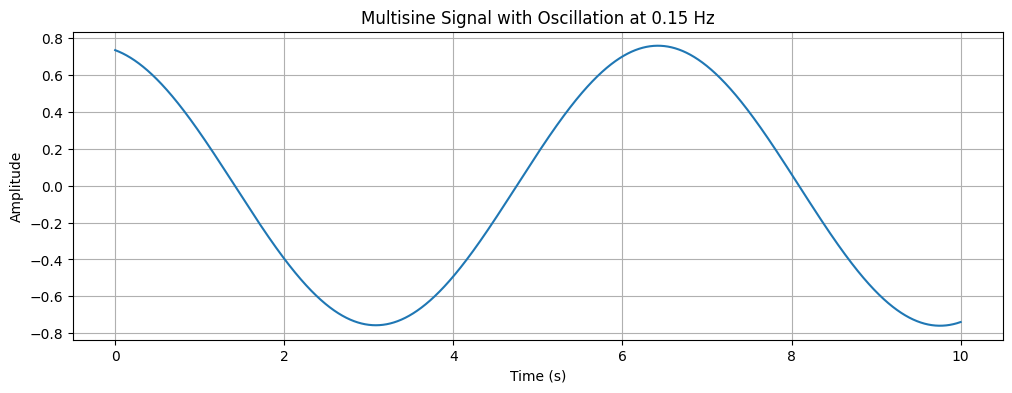

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
sampling_rate = 1000  # Sampling rate (Hz)
duration = 10  # Signal duration (seconds)
target_frequency = 0.15  # Target oscillatory response (Hz)
num_samples = sampling_rate * duration

# Generate time vector
t = np.linspace(0, duration, num_samples)

# Generate multisine signal
amplitude = 1.0  # Amplitude of the multisine
frequency_range = np.linspace(0.01, 10, num_samples)  # Frequency range for the multisine

# Create a random phase for each frequency component
phases = 2 * np.pi * np.random.rand(len(frequency_range))

# Compute the multisine signal
signal = amplitude * np.sin(2 * np.pi * frequency_range * t[:, np.newaxis] + phases)

# Add the oscillatory response at the target frequency
oscillation = 0.5 * np.sin(2 * np.pi * target_frequency * t)
signal[:, np.argmin(np.abs(frequency_range - target_frequency))] += oscillation

# Plotting the signal
plt.figure(figsize=(12, 4))
plt.plot(t, signal[:, np.argmin(np.abs(frequency_range - target_frequency))])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Multisine Signal with Oscillation at 0.15 Hz')
plt.grid(True)
plt.show()
